Oxford-pets, Resnet34

In [0]:
from fastai import *
from fastai.vision import *
import matplotlib as plt
from PIL import Image

In [3]:
path = untar_data(URLs.PETS) # getting data(FAI)

In [4]:
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [5]:
path.ls() # checking paths

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [7]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_60.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_96.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_73.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_56.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_6.jpg')]

In [0]:
pattern_label = r'/([^/]+)_\d+.jpg$'
np.random.seed(1)

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pattern_label, ds_tfms=get_transforms(), size=224)

In [10]:
data.normalize(imagenet_stats) # normalize to make the mean and SD of different channels(RGB) of the imges to zero and one respectively

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_pit_bull_terrier,basset_hound,staffordshire_bull_terrier,samoyed,yorkshire_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_bulldog,miniature_pinscher,miniature_pinscher,shiba_inu,keeshond
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

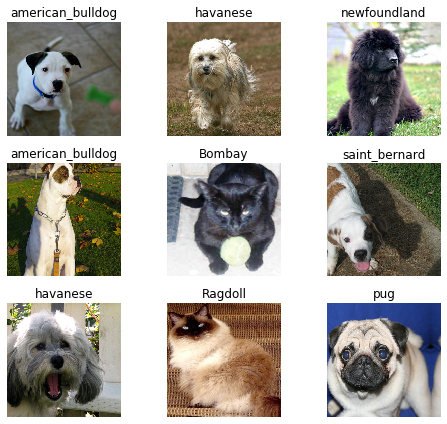

In [11]:
data.show_batch(rows=3, figsize=(7,6))

In [12]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [13]:
len(data.classes)

37

In [14]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 22.3MB/s]


In [15]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.519426,0.309154,0.100135,01:22
1,0.637294,0.309648,0.092693,01:21
2,0.435239,0.272449,0.087957,01:21
3,0.311092,0.228633,0.070365,01:22
4,0.229652,0.226257,0.063599,01:22


In [0]:
learn.save('stage-1')

<h1>Results</h1>

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

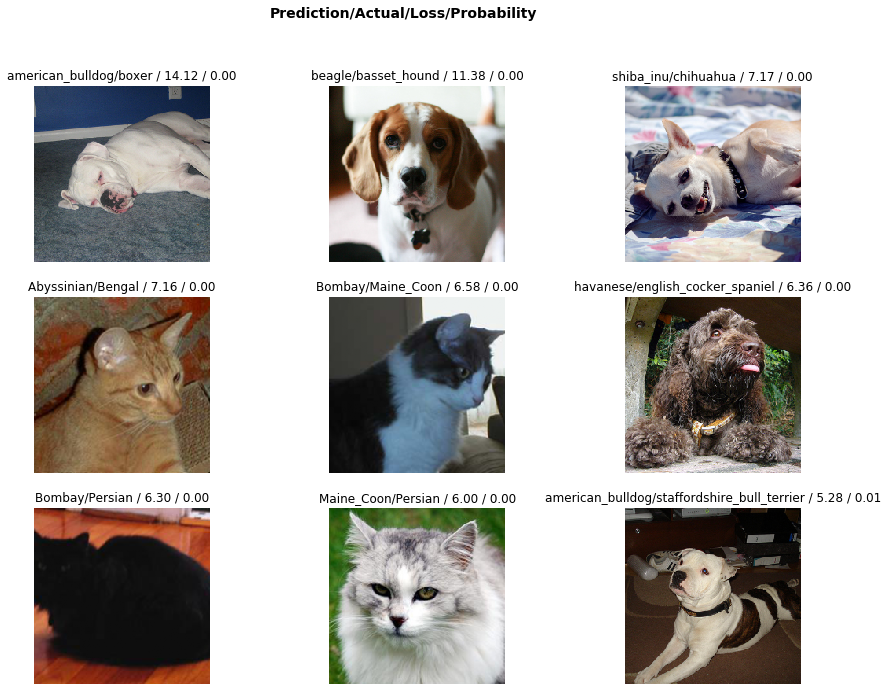

In [18]:
interp.plot_top_losses(9, figsize=(15, 11))

In [19]:
doc(interp.plot_top_losses)

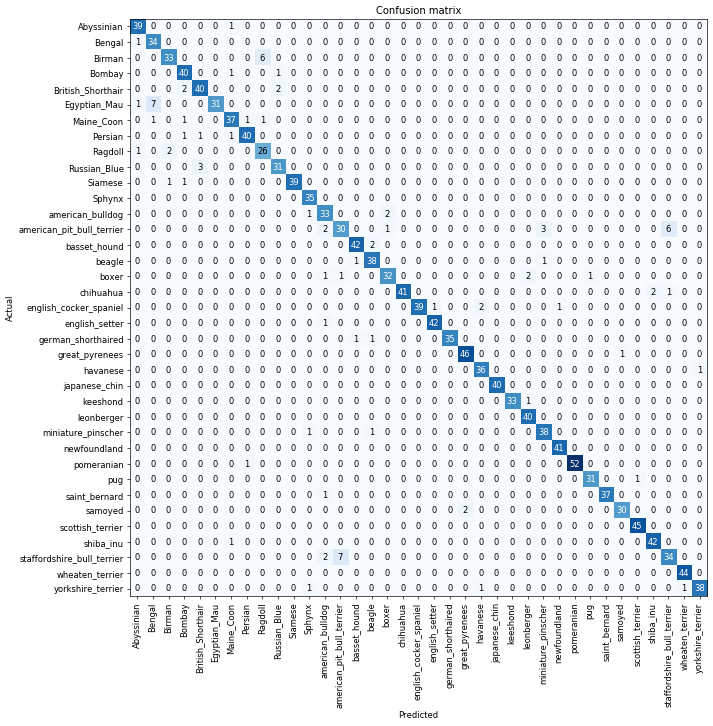

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [23]:
interp.most_confused(min_val=3)

[('Egyptian_Mau', 'Bengal', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('Birman', 'Ragdoll', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_pit_bull_terrier', 'miniature_pinscher', 3)]

Unfreezing and fine tuning

In [0]:
learn.unfreeze()

In [25]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.684500,0.370274,0.115020,01:23


In [0]:
learn.load('stage-1')

In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


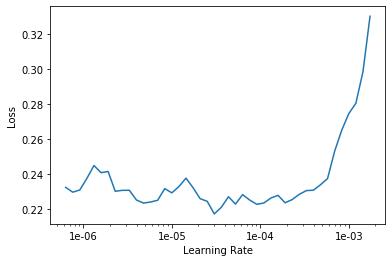

In [38]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [40]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 5e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.229646,0.224551,0.066982,01:22
1,0.208496,0.214111,0.065629,01:20


<h1>Resnet50 model, bigger images, bigger batch size for transfer learning

In [0]:
data1 = ImageDataBunch.from_name_re(path_img, fnames, pattern_label, ds_tfms=get_transforms(), size=299, bs=64)

In [0]:
data1.normalize(imagenet_stats)

In [0]:
learn1 = create_cnn(data1, models.resnet50, metrics=error_rate)

In [46]:
learn1.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.909988,0.327232,0.094723,01:58
1,0.461359,0.260119,0.076455,01:54
2,0.292678,0.219529,0.062923,01:57
3,0.196122,0.190867,0.056834,01:59
4,0.135056,0.184373,0.053451,01:58


In [0]:
learn1.save('stage-1-50')

In [0]:
learn1.unfreeze()

In [51]:
learn1.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.675920,0.313637,0.106225,02:03


In [0]:
learn1.load('stage-1-50')

In [53]:
learn1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


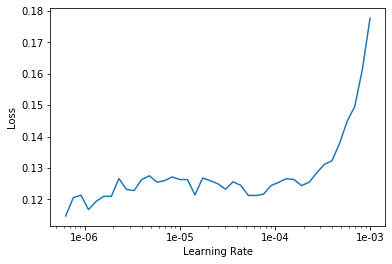

In [54]:
learn1.recorder.plot()

In [0]:
learn1.unfreeze()

In [56]:
learn1.fit_one_cycle(2, max_lr=slice(1e-6, 5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.142892,0.193107,0.060893,02:02
1,0.106905,0.162742,0.045332,02:04


In [0]:
learn1.save('stage-1-50-mod')

<h1>MNIST_SAMPLE(3 and 7) creating databunch using 'from_folder' 

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/valid'),
 PosixPath('/root/.fastai/data/mnist_sample/train')]

In [0]:
path_labels = path/'labels'
path_valid = path/'valid'
path_train = path/'train'

In [16]:
path_train.ls()

[PosixPath('/root/.fastai/data/mnist_sample/train/3'),
 PosixPath('/root/.fastai/data/mnist_sample/train/7')]

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

In [18]:
data

ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Test: None

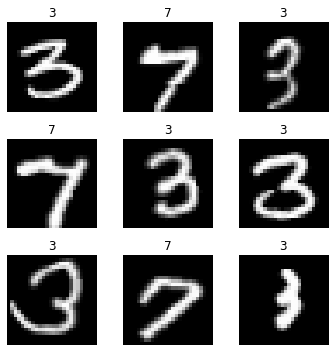

In [20]:
data.show_batch(rows=3, figsize=(5,5))

In [21]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:02<00:00, 23.2MB/s]


In [23]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.108815,0.056137,0.980864,00:16
1,0.077194,0.034737,0.988714,00:16
2,0.066731,0.028009,0.989696,00:16
3,0.061687,0.024061,0.992149,00:16
4,0.047814,0.022234,0.993131,00:16


<h1>MNIST_SAMPLE(3 and 7) creating databunch using the 'labels.csv' file</h1>

In [0]:
df = pd.read_csv(path/'labels.csv')

In [36]:
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data_csv = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=26)

In [38]:
data_csv

ImageDataBunch;

Train: LabelList (11548 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
0,0,0,0,0
Path: /root/.fastai/data/mnist_sample;

Valid: LabelList (2886 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
0,1,1,0,1
Path: /root/.fastai/data/mnist_sample;

Test: None

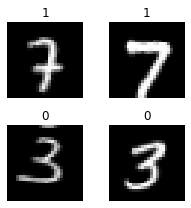

In [39]:
data_csv.show_batch(rows=2, figsize=(3,3))

In [40]:
data_csv.classes

[0, 1]

In [0]:
learn_csv = cnn_learner(data_csv, models.resnet18, metrics=accuracy)

In [42]:
learn_csv.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.358849,0.166654,0.935897,00:14
1,0.168769,0.103451,0.955994,00:14
2,0.114843,0.054705,0.979557,00:15
3,0.096019,0.033092,0.988912,00:14
4,0.079061,0.032406,0.988912,00:14


<h1>MNIST_SAMPLE(3 and 7) creating databunch using RegEx</h1>

In [0]:
pattern = r'/(\d)/\d+\.png$'

In [0]:
fn_paths = [path/name for name in df['name']]

In [63]:
fn_paths[:2]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [0]:
data_reg = ImageDataBunch.from_name_re(path, fn_paths, pat=pattern, ds_tfms=tfms, size=26)

In [65]:
data_reg

ImageDataBunch;

Train: LabelList (11548 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Valid: LabelList (2886 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
7,3,3,7,3
Path: /root/.fastai/data/mnist_sample;

Test: None

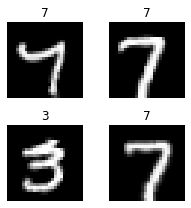

In [66]:
data_reg.show_batch(rows=2, figsize=(3,3))

In [0]:
learn_reg = cnn_learner(data_reg, models.resnet18, metrics=accuracy)

In [68]:
learn_reg.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.203526,0.094837,0.961538,00:16
1,0.120946,0.051662,0.981636,00:16
2,0.108039,0.037705,0.989605,00:15
3,0.066713,0.021860,0.992377,00:15
4,0.078224,0.018173,0.994110,00:16


<h1>MNIST_SAMPLE(3 and 7) creating databunch using RegEx with Lamba func</h1>

In [0]:
pattern = r'/(\d)/\d+\.png$'

In [0]:
fn_paths = [path/name for name in df['name']]

In [0]:
data_lambda = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=26, 
                                          label_func= lambda x : '3' if '/3/' in str(x) else '7')

In [72]:
data_lambda

ImageDataBunch;

Train: LabelList (11548 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Valid: LabelList (2886 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
7,7,7,3,3
Path: /root/.fastai/data/mnist_sample;

Test: None

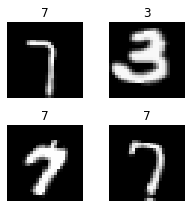

In [73]:
data_lambda.show_batch(rows=2, figsize=(3,3))

In [0]:
learn_lambda = cnn_learner(data_lambda, models.resnet18, metrics=accuracy)

In [75]:
learn_lambda.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.197588,0.076690,0.972973,00:15
1,0.121993,0.054215,0.979903,00:15
2,0.092091,0.042031,0.986140,00:15
3,0.080076,0.023034,0.994802,00:15
4,0.054163,0.012242,0.995495,00:15


<h1>MNIST_SAMPLE(3 and 7) creating databunch using RegEx with Lamba func</h1>

In [0]:
labels=[('3' if '/3/' in str(x) else '7') for x in fn_paths]

In [0]:
data_labels = ImageDataBunch.from_lists(path, fn_paths, ds_tfms=tfms, size=26, labels=labels)

In [82]:
data_labels

ImageDataBunch;

Train: LabelList (11548 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Valid: LabelList (2886 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
3,3,3,3,7
Path: /root/.fastai/data/mnist_sample;

Test: None

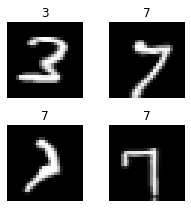

In [84]:
data_labels.show_batch(rows=2, figsize=(3,3))

In [0]:
learn_labels = cnn_learner(data_labels, models.resnet18, metrics=accuracy)

In [86]:
learn_labels.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.197538,0.108452,0.959806,00:15
1,0.124354,0.056561,0.977824,00:15
2,0.086834,0.042102,0.983714,00:15
3,0.063490,0.031378,0.988912,00:16
4,0.059961,0.023295,0.992031,00:15
